# Importing Libraries:

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

#Statistical libraries
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve, r2_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

# Data Understanding:

In [69]:
data= pd.read_csv('data.csv')
print('Dataset shape: ',data.shape) 
data.head()

Dataset shape:  (250000, 33)


EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3                  9.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0               3.064      41.928  ...            2              67.435   
1               3.473       2.078  ...            1              46.226   
2               3.148       9.336  ...            1              44.251   
3               3.310       0.414  ...            0            -999.000   
4               3.891      16.405  ...            0            -999.000   

   PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
0                2.150                0.444                 46.062   
1                0.725                1.158               -999.000   
2                2.053               -2.028               -999.000   
3             -999.000             -999.000               -999.000   
4             -999.000             -999.000               -999.000   

   PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt    Weight  \
0                    1.24                  -2.475         113.497  0.002653   
1                 -999.00                -999.000          46.226  2.233584   
2                 -999.00                -999.000          44.251  2.347389   
3                 -999.00                -999.000           0.000  5.446378   
4                 -999.00                -999.000           0.000  6.245333   

   Label  
0      s  
1      b  
2      b  
3      b  
4      b  

[5 rows x 33 columns]

In [3]:
data.describe() #viewing statistics of data

EventId   DER_mass_MMC  DER_mass_transverse_met_lep  \
count  250000.000000  250000.000000                250000.000000   
mean   224999.500000     -49.023079                    49.239819   
std     72168.927986     406.345647                    35.344886   
min    100000.000000    -999.000000                     0.000000   
25%    162499.750000      78.100750                    19.241000   
50%    224999.500000     105.012000                    46.524000   
75%    287499.250000     130.606250                    73.598000   
max    349999.000000    1192.026000                   690.075000   

        DER_mass_vis       DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  \
count  250000.000000  250000.000000         250000.000000     250000.000000   
mean       81.181982      57.895962           -708.416643       -601.237051   
std        40.828691      63.655682            454.482458        657.972302   
min         6.329000       0.000000           -999.000000       -999.000000   
25%        59.388750      14.068750           -999.000000       -999.000000   
50%        73.752000      38.467500           -999.000000       -999.000000   
75%        92.259000      79.169000              0.490000         83.446000   
max      1349.351000    2834.999000              9.000000       4974.979000   

       DER_prodeta_jet_jet  DER_deltar_tau_lep     DER_pt_tot  ...  \
count        250000.000000       250000.000000  250000.000000  ...   
mean           -709.356603            2.373100      18.917332  ...   
std             453.019877            0.782911      22.273494  ...   
min            -999.000000            0.208000       0.000000  ...   
25%            -999.000000            1.810000       2.841000  ...   
50%            -999.000000            2.491500      12.315500  ...   
75%              -4.593000            2.961000      27.591000  ...   
max              16.690000            5.684000    2834.999000  ...   

       PRI_met_sumet    PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
count  250000.000000  250000.000000       250000.000000        250000.000000   
mean      209.797178       0.979176         -348.329567          -399.254314   
std       126.499506       0.977426          532.962789           489.338286   
min        13.678000       0.000000         -999.000000          -999.000000   
25%       123.017500       0.000000         -999.000000          -999.000000   
50%       179.739000       1.000000           38.960000            -1.872000   
75%       263.379250       2.000000           75.349000             0.433000   
max      2003.976000       3.000000         1120.573000             4.499000   

       PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
count        250000.000000          250000.000000           250000.000000   
mean           -399.259788            -692.381204             -709.121609   
std             489.333883             479.875496              453.384624   
min            -999.000000            -999.000000             -999.000000   
25%            -999.000000            -999.000000             -999.000000   
50%              -2.093000            -999.000000             -999.000000   
75%               0.503000              33.703000               -2.457000   
max               3.141000             721.456000                4.500000   

       PRI_jet_subleading_phi  PRI_jet_all_pt         Weight  
count           250000.000000   250000.000000  250000.000000  
mean              -709.118631       73.064591       1.646767  
std                453.389017       98.015662       1.875103  
min               -999.000000        0.000000       0.001502  
25%               -999.000000        0.000000       0.018636  
50%               -999.000000       40.512500       1.156188  
75%                 -2.275000      109.933750       2.404128  
max                  3.142000     1633.433000       7.822543  

[8 rows x 32 columns]

In [4]:
data.info() #train datatype summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

- Data does not contain any null value
- datatype: 1 object, 2 integer and 30 float type

(250000, 32)


# EDA(Exploratory Data Analysis):

In [44]:
# for label contains 's' for Signal events and 'b' for Background events
# we can seperate datasets for signal and background events and perform EDAt
data_s = data[data['Label']=='s'] # signal event dataframe
data_b = data[data['Label']=='b'] # background event dataframe

# Target Variable

Signal event dataframe shape:  (85667, 33)
Background event dataframe shape:  (164333, 33)


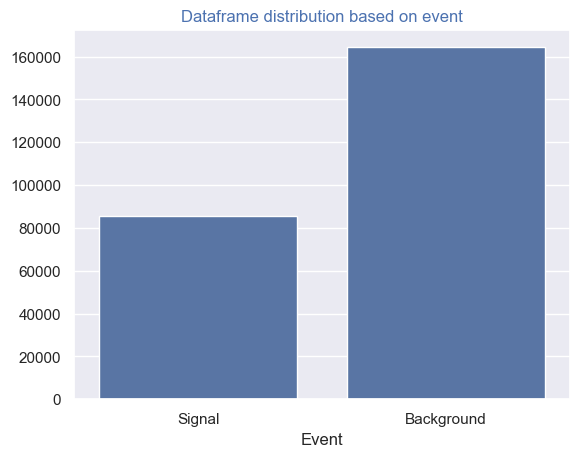

In [6]:
#distribution of signal and background event dataframes
print('Signal event dataframe shape: ',data_s.shape)
print('Background event dataframe shape: ',data_b.shape)

sns.barplot(x=['Signal','Background'], y=[85667,164333])
plt.xlabel('Event')
plt.title('Dataframe distribution based on event', color='b')

plt.show()

**Observation:**
- Signal events and Background events are nearly **1:2 ratio**
- Data imbalance has to be handled

# FEATURES VARIABLE

# checking outliers (-999) values

In [9]:
#defining function for finding data with outlier values(-999.0)
def Outlier(dataset):
    index = [col for col in dataset.columns if -999.0 in dataset[col].value_counts().index] #index of the columns that contains -999.0
    data = [dataset[col].value_counts()[-999.0]/len(dataset)*100 for col in index] #column values percentage
    return pd.Series(index = index, data = data).sort_values(ascending = False)

In [49]:
#finding percentage of the data samples containing -999.0
Outlier_df = pd.DataFrame()
Outlier_df['Background'] = Outlier(data_b).values
Outlier_df['Signal'] = Outlier(data_s).values
Outlier_df['All events'] = Outlier(data).values
Outlier_df.set_index(Outlier(data).index, inplace = True)
Outlier_df.style.set_caption("Percentage % of Outlier in the Data columns")

**Observation**
- 7 features have more than 70 % (-999) values
- 3 features have about 40 % (-999) values
- We will further explore the these to check the importance of these features through mutual info gain & correlation.

<Axes: >

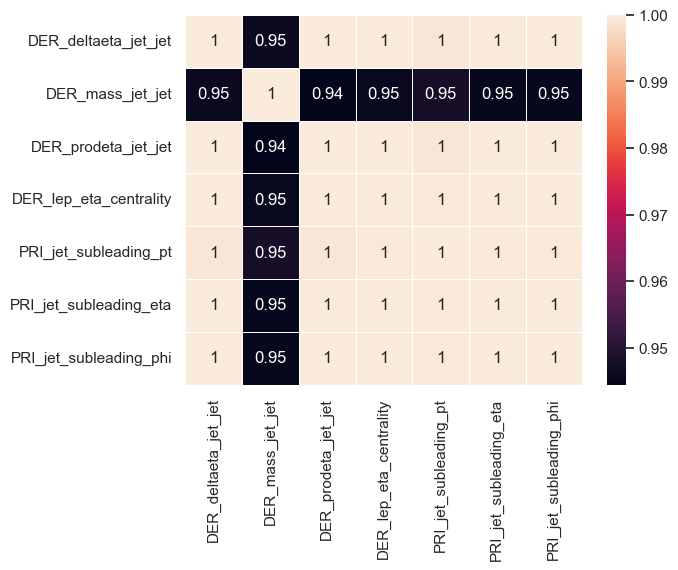

In [11]:
#columns with high (-999) values
columns_999=['DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet','DER_lep_eta_centrality','PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi']
sns.heatmap(data[columns_999].corr().abs(),annot=True,linewidth=0.5)

In [47]:
# as the outliers are "Undefined" ie. -999.0 we will replace them with np.nan values for better analysis
data_aa=data.copy(deep = True)
data_ss=data_s.copy(deep = True)
data_bb=data_b.copy(deep = True)
for col in columns_999:
    data_aa[col]=data_aa[col].replace(-999.0,np.nan)
for col in columns_999:
    data_ss[col]=data_ss[col].replace(-999.0,np.nan)
    data_bb[col]=data_bb[col].replace(-999.0,np.nan)



In [48]:
data.head()

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3                  9.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0               3.064      41.928  ...            2              67.435   
1               3.473       2.078  ...            1              46.226   
2               3.148       9.336  ...            1              44.251   
3               3.310       0.414  ...            0            -999.000   
4               3.891      16.405  ...            0            -999.000   

   PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
0                2.150                0.444                 46.062   
1                0.725                1.158               -999.000   
2                2.053               -2.028               -999.000   
3             -999.000             -999.000               -999.000   
4             -999.000             -999.000               -999.000   

   PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt    Weight  \
0                    1.24                  -2.475         113.497  0.002653   
1                 -999.00                -999.000          46.226  2.233584   
2                 -999.00                -999.000          44.251  2.347389   
3                 -999.00                -999.000           0.000  5.446378   
4                 -999.00                -999.000           0.000  6.245333   

   Label  
0      s  
1      b  
2      b  
3      b  
4      b  

[5 rows x 33 columns]

- High outlier columns analysis

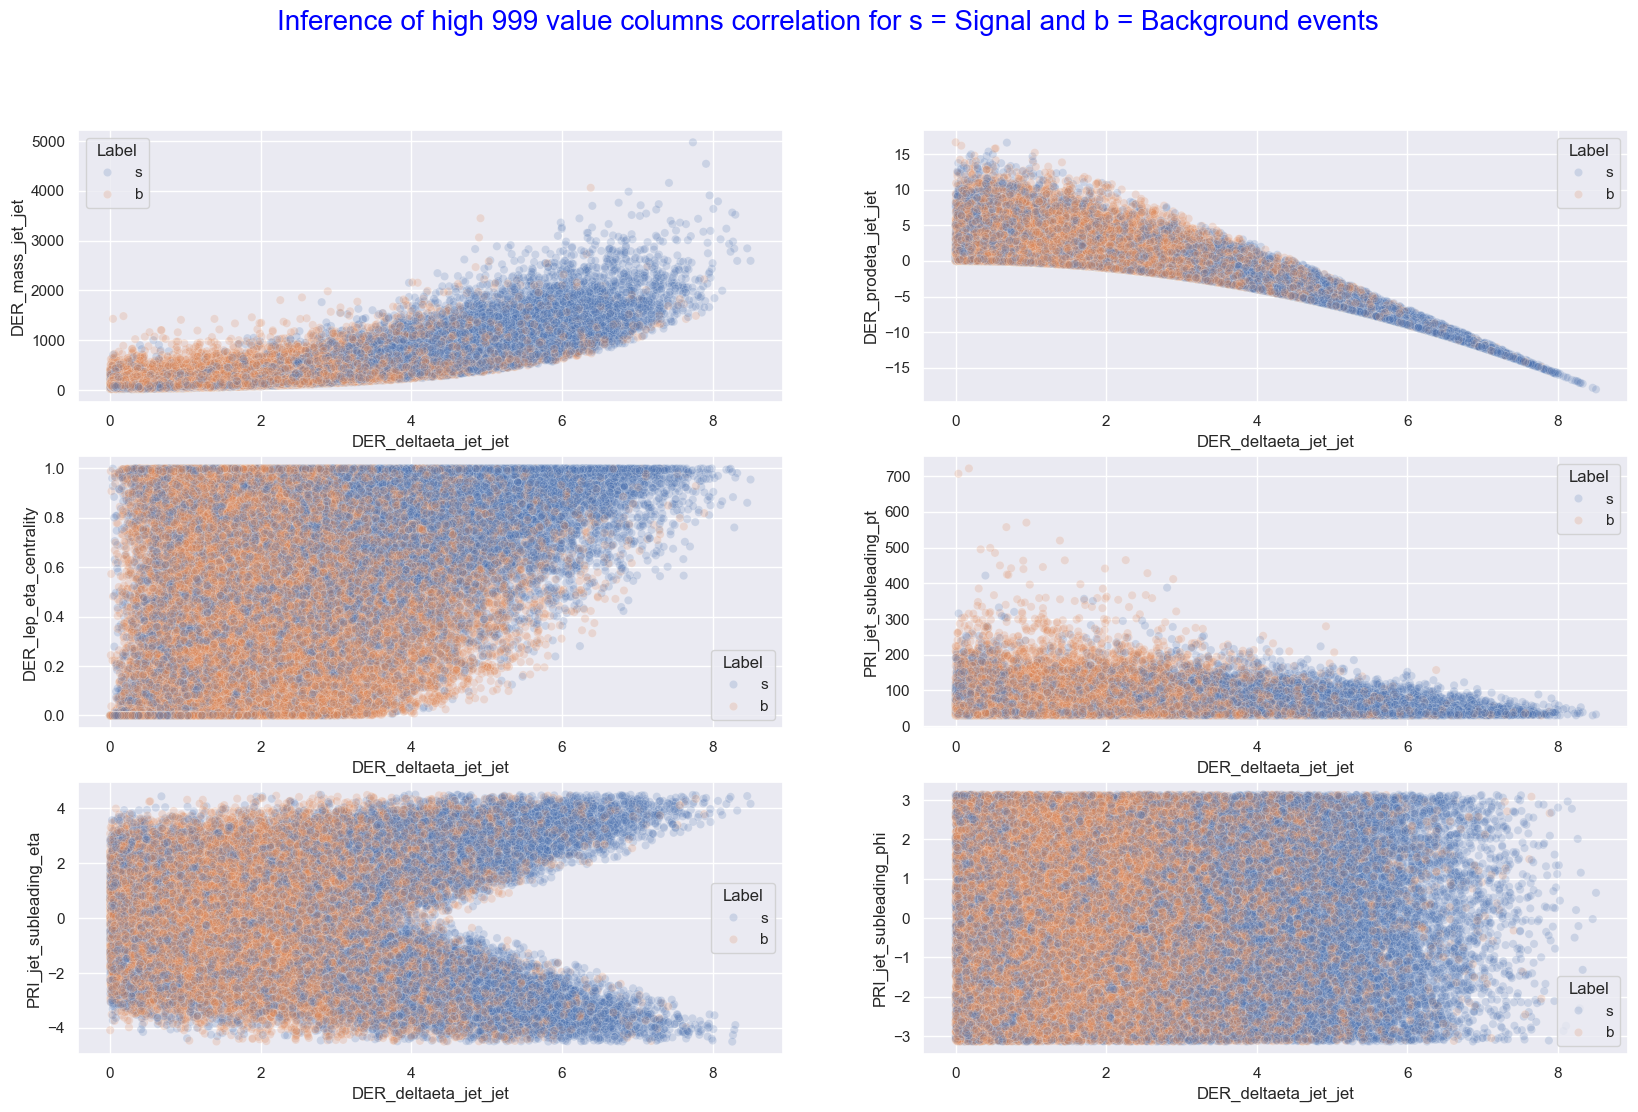

In [50]:
# Inference of predictor correlation for s = Signal and b = Background events
plt.figure(figsize=(20,12))
for idx, col in enumerate(columns_999[1:]):
    plt.subplot(3,2,idx+1)
    sns.scatterplot(x= data_aa.DER_deltaeta_jet_jet,y=data_aa[col], hue=data.Label, alpha=0.2) 
    plt.xlabel(columns_999[0]) #xlabel
    plt.ylabel(col) #ylabel
plt.suptitle('Inference of high 999 value columns correlation for s = Signal and b = Background events', size=20,color='blue')
plt.show()


Collinearity among Predictors in Train dataset after replacing Outliers by NAN values 



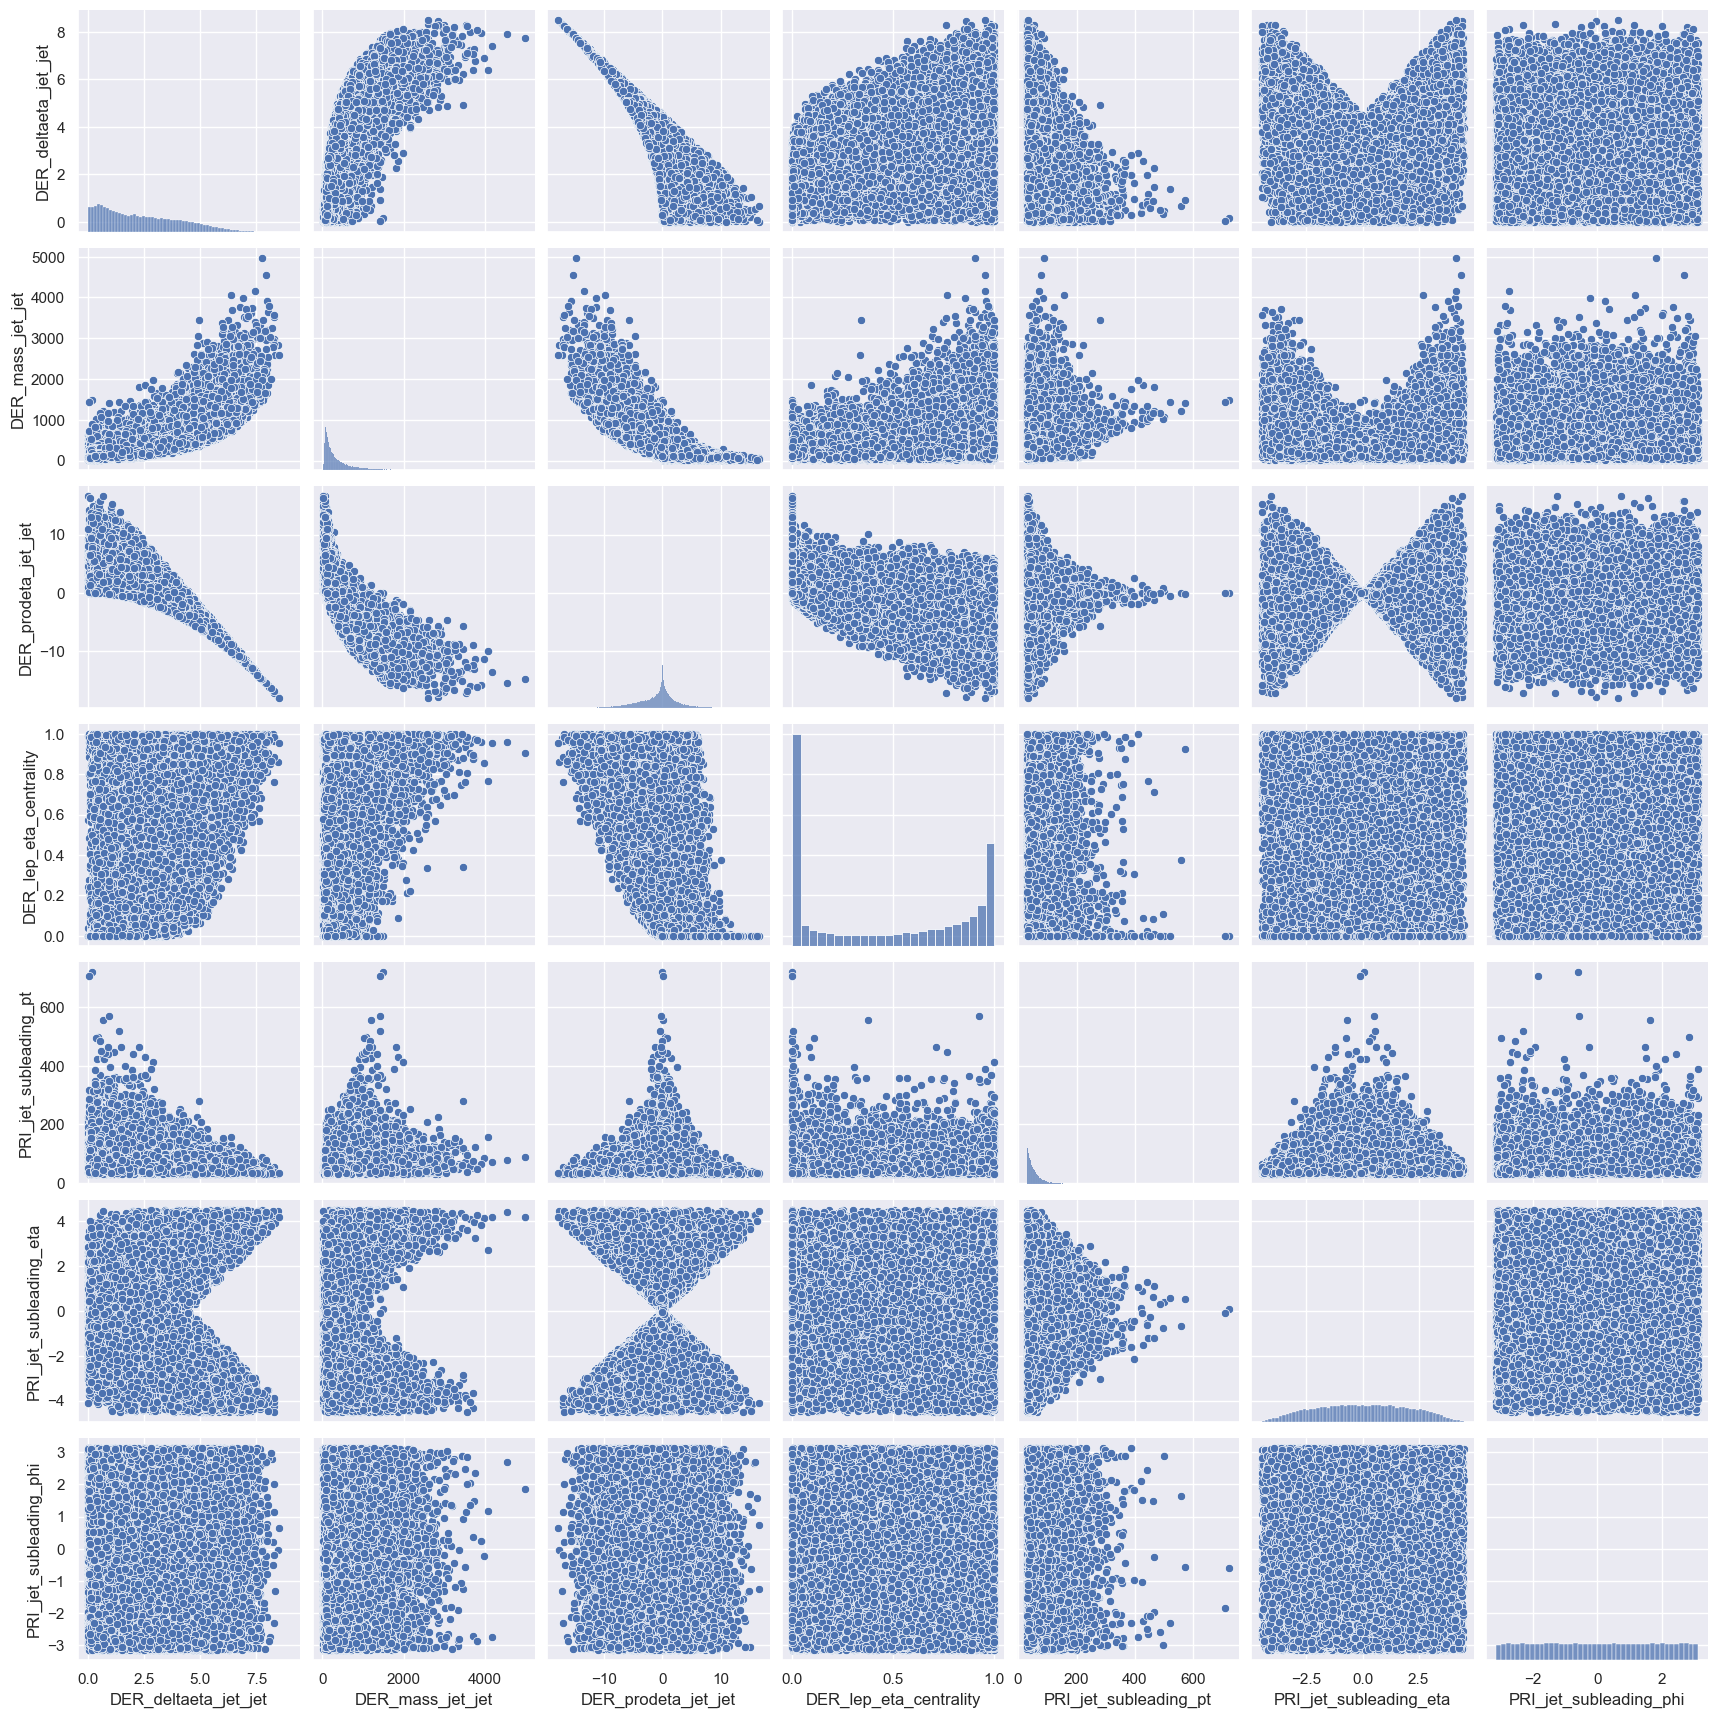

In [52]:
#pair plot between the correlated predeictors for whole dataset
#as we are going drop these columns, lets check their collinearity
print('Collinearity among Predictors in Train dataset after replacing Outliers by NAN values \n')

sns.pairplot(data=data_aa[columns_999]) #pair wise scatter plot inference
plt.show()

# Univariate distributions of the features VS target variable

In [22]:
def hist_target(df, cols, target, bins, ncols = 3):
    nrows = math.ceil(len(cols) / ncols)
    fig, ax = plt.subplots(nrows, ncols, figsize = (5 * ncols, 4.2 * nrows), sharey = False)
    for i in range(len(cols)):
        sns.histplot(data = df, x = cols[i], bins = bins, hue = target, palette = ['orange', 'blue'], ax = ax[i // ncols, i % ncols])
        ax[i // ncols, i % ncols].set_xlabel(cols[i])
        if i % ncols != 0:
            ax[i // ncols, i % ncols].set_ylabel(" ")
    plt.tight_layout()
    plt.show()

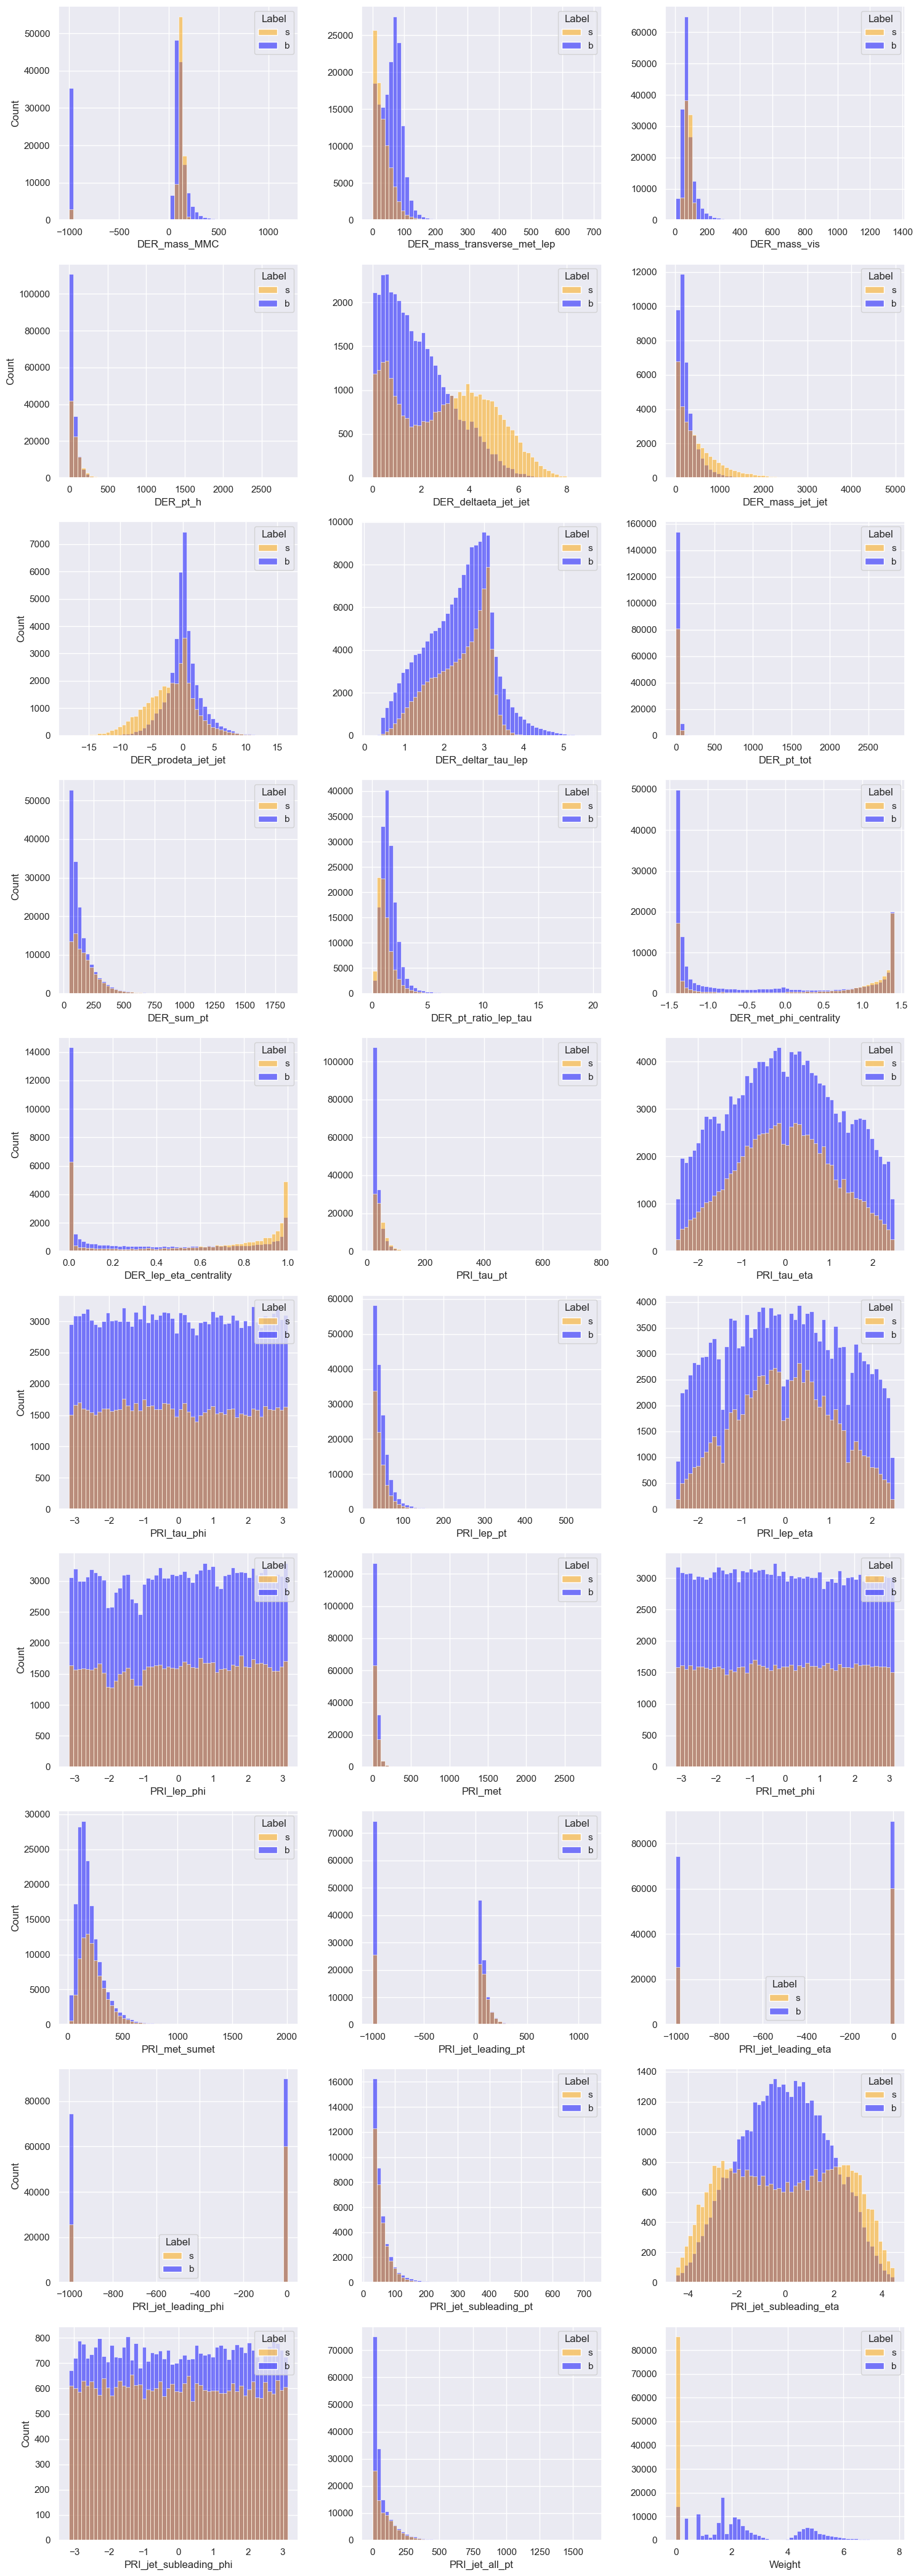

In [118]:
import math
hist_target(data_aa,
     list(data_aa.columns[data_aa.dtypes == 'float64']),
     target = 'Label',
     bins = max(math.floor(len(data_bb)**(1/3)), math.floor(len(data_ss)**(1/3))),
     ncols = 3)

## Correlation Analysis

- Correlation heatmap for all features

<Axes: >

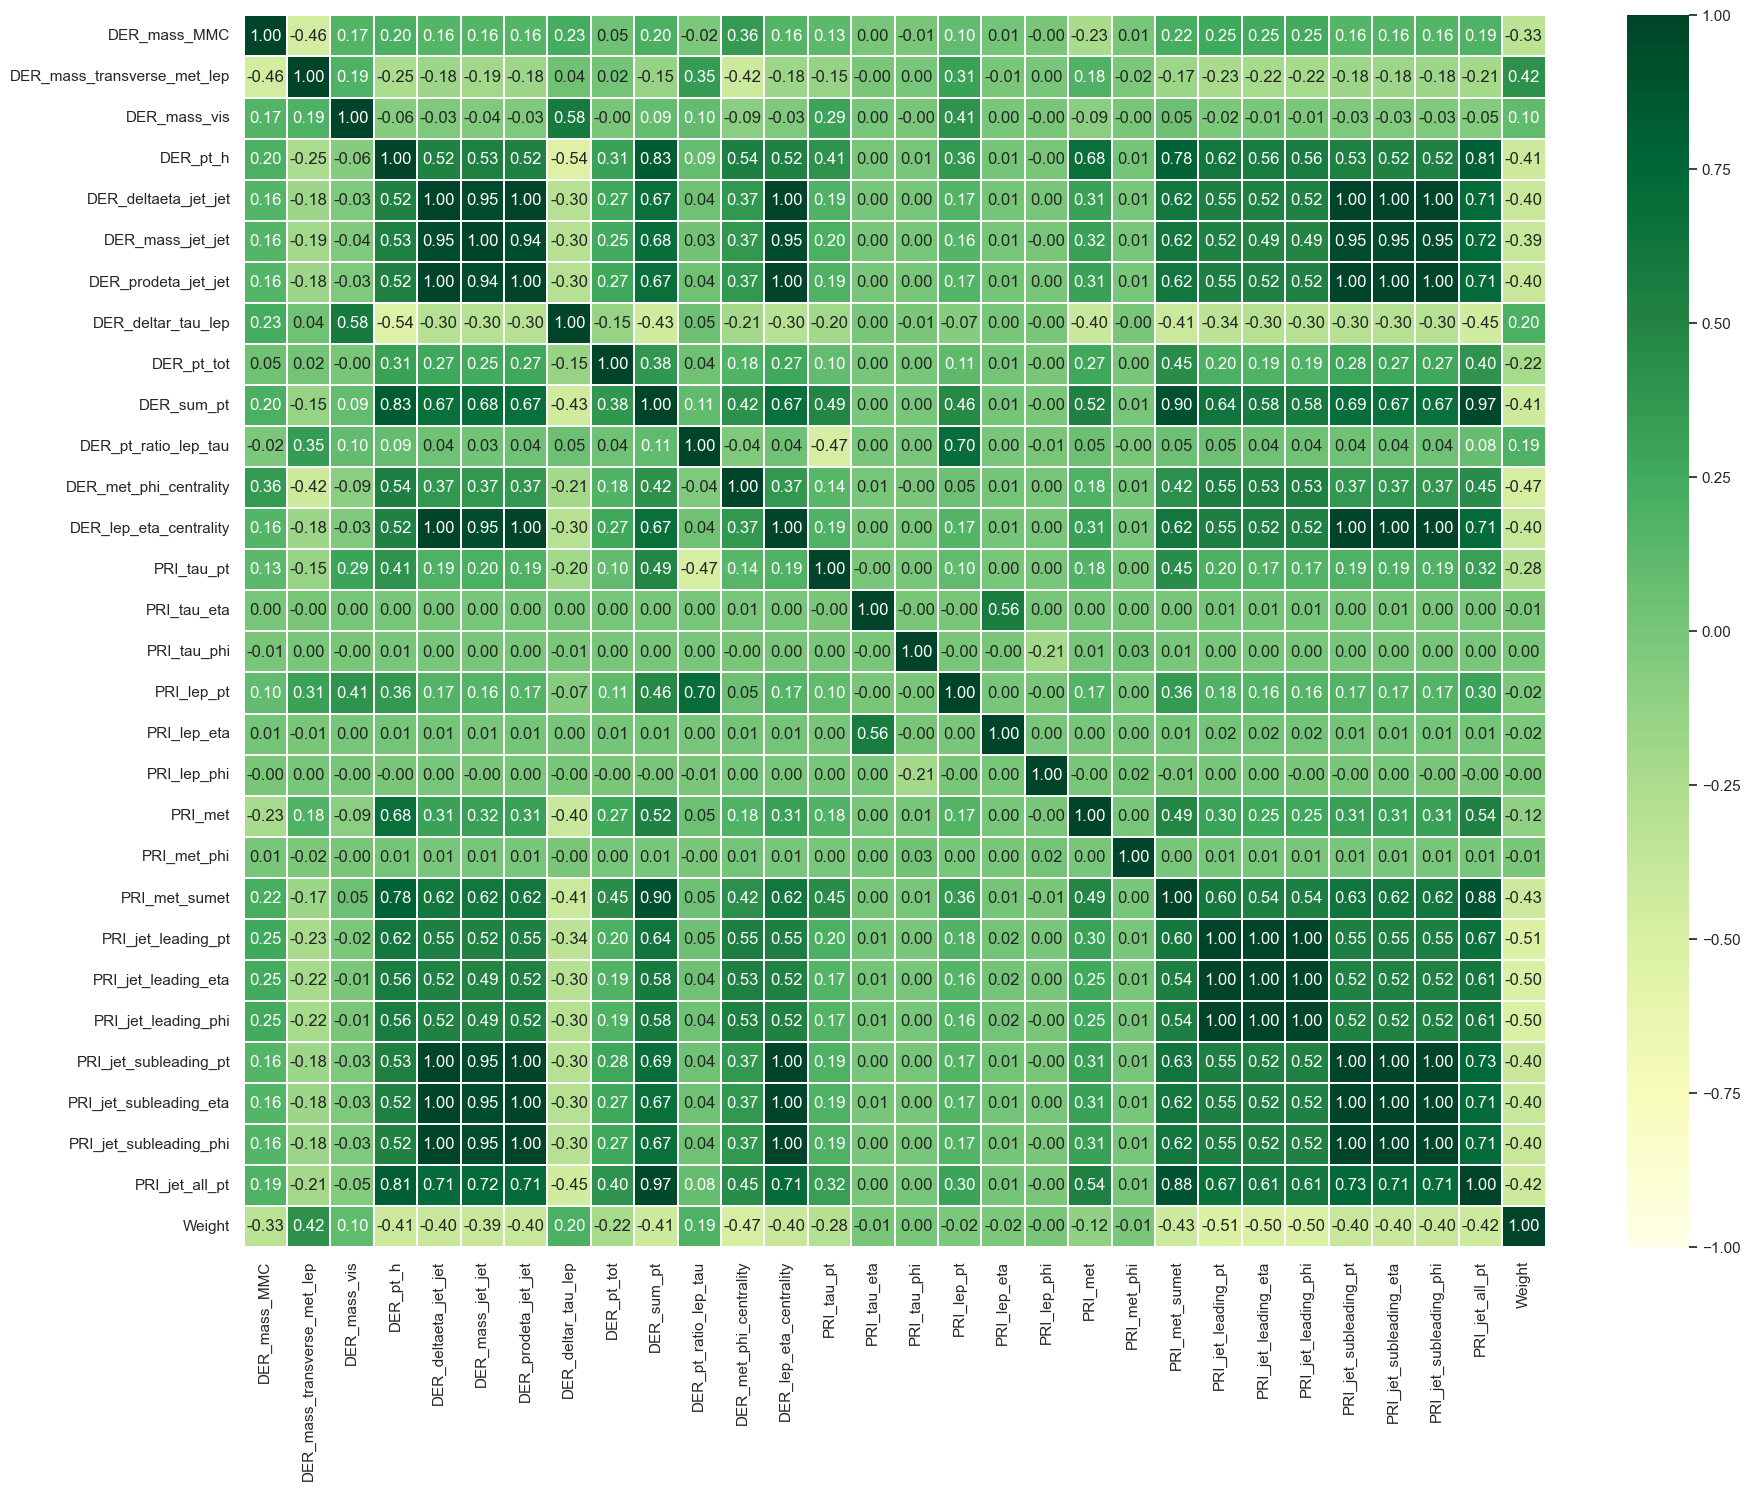

In [64]:
plt.figure(figsize = (21,16))
sns.heatmap(data[data.columns[data.dtypes == 'float64']].corr(), vmin = -1, vmax = 1, annot = True, cmap="YlGn", linewidths=.3,fmt='.2f')



- Correlation heatmap for all features for signal & background

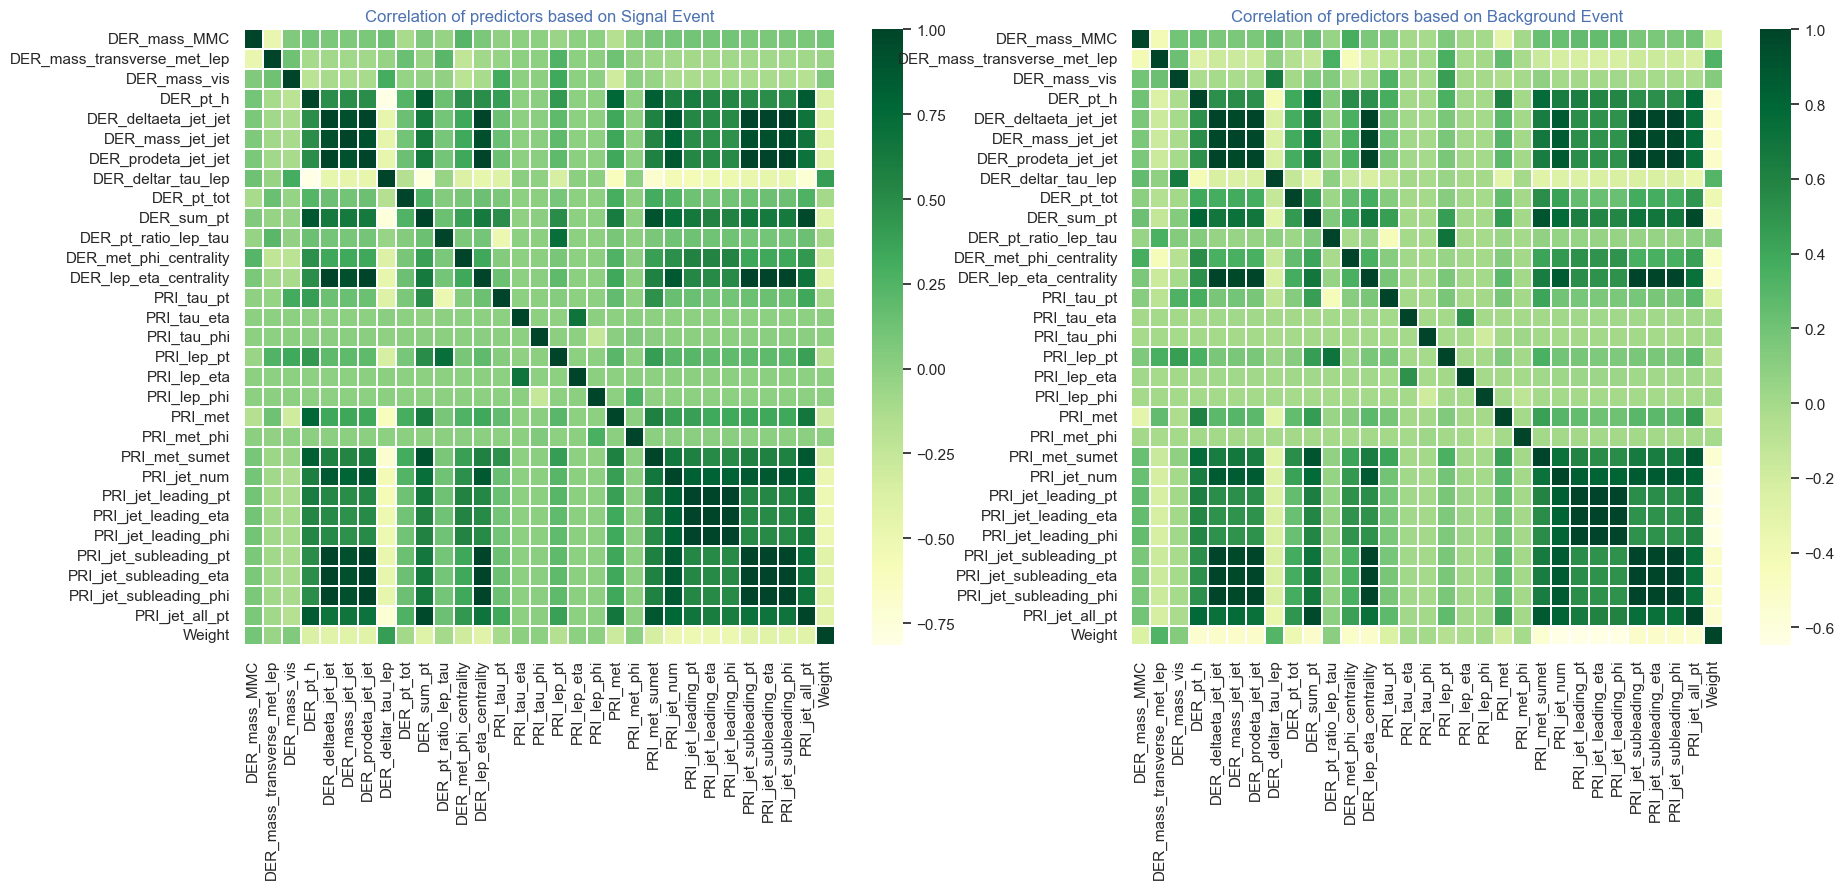

In [12]:
plt.figure(figsize=(21,8))
plt.subplot(1,2,1)
sns.heatmap(data_s.corr(),cmap="YlGn", linewidths=.3) # signal event correlations
plt.title('Correlation of predictors based on Signal Event',color='b')

plt.subplot(1,2,2)
sns.heatmap(data_b.corr(),cmap="YlGn", linewidths=.3) #background event correlations
plt.title('Correlation of predictors based on Background Event',color='b')
plt.show()

- Correlation coefficient of features

In [54]:
df_corr = pd.DataFrame(columns = ['feature_1', 'feature_2','Background','Signal','All events'])
cols = data.columns[data.dtypes == 'float64']
for i in range(len(cols)):
    for j in range(len(cols)):
        if i<j:
            df_corr.loc[len(df_corr.index)] = [cols[i], cols[j],data_b[cols[i]].corr(data_b[cols[j]]),data_s[cols[i]].corr(data_s[cols[j]]), data[cols[i]].corr(data[cols[j]])]
df_corr.sort_values(by = 'All events', ascending = False, inplace = True)
df_corr.head(30)

feature_1               feature_2  Background    Signal  \
296  DER_lep_eta_centrality  PRI_jet_subleading_phi    0.999998  0.999997   
295  DER_lep_eta_centrality  PRI_jet_subleading_eta    0.999998  0.999996   
429  PRI_jet_subleading_eta  PRI_jet_subleading_phi    0.999996  0.999993   
414     PRI_jet_leading_eta     PRI_jet_leading_phi    0.999993  0.999988   
164     DER_prodeta_jet_jet  DER_lep_eta_centrality    0.999994  0.999985   
179     DER_prodeta_jet_jet  PRI_jet_subleading_phi    0.999993  0.999984   
117    DER_deltaeta_jet_jet  DER_lep_eta_centrality    0.999982  0.999998   
178     DER_prodeta_jet_jet  PRI_jet_subleading_eta    0.999993  0.999982   
132    DER_deltaeta_jet_jet  PRI_jet_subleading_phi    0.999980  0.999994   
131    DER_deltaeta_jet_jet  PRI_jet_subleading_eta    0.999980  0.999993   
111    DER_deltaeta_jet_jet     DER_prodeta_jet_jet    0.999973  0.999973   
294  DER_lep_eta_centrality   PRI_jet_subleading_pt    0.999274  0.999445   
425   PRI_jet_subleading_pt  PRI_jet_subleading_eta    0.999272  0.999441   
426   PRI_jet_subleading_pt  PRI_jet_subleading_phi    0.999271  0.999442   
177     DER_prodeta_jet_jet   PRI_jet_subleading_pt    0.999264  0.999438   
130    DER_deltaeta_jet_jet   PRI_jet_subleading_pt    0.999251  0.999434   
407      PRI_jet_leading_pt     PRI_jet_leading_eta    0.996806  0.994374   
408      PRI_jet_leading_pt     PRI_jet_leading_phi    0.996805  0.994376   
243              DER_sum_pt          PRI_jet_all_pt    0.963005  0.969191   
154        DER_mass_jet_jet   PRI_jet_subleading_pt    0.979625  0.924588   
110    DER_deltaeta_jet_jet        DER_mass_jet_jet    0.977197  0.923428   
141        DER_mass_jet_jet  DER_lep_eta_centrality    0.977002  0.922760   
156        DER_mass_jet_jet  PRI_jet_subleading_phi    0.976967  0.922664   
155        DER_mass_jet_jet  PRI_jet_subleading_eta    0.976966  0.922658   
135        DER_mass_jet_jet     DER_prodeta_jet_jet    0.976536  0.921055   
236              DER_sum_pt           PRI_met_sumet    0.901367  0.905739   
405           PRI_met_sumet          PRI_jet_all_pt    0.881531  0.883746   
89                 DER_pt_h              DER_sum_pt    0.804656  0.872952   
108                DER_pt_h          PRI_jet_all_pt    0.780305  0.856535   
101                DER_pt_h           PRI_met_sumet    0.762956  0.818574   

     All events  
296    0.999998  
295    0.999997  
429    0.999995  
414    0.999992  
164    0.999990  
179    0.999989  
117    0.999989  
178    0.999988  
132    0.999986  
131    0.999985  
111    0.999972  
294    0.999355  
425    0.999352  
426    0.999352  
177    0.999347  
130    0.999337  
407    0.996100  
408    0.996100  
243    0.965628  
154    0.947652  
110    0.946035  
141    0.945584  
156    0.945507  
155    0.945505  
135    0.944443  
236    0.904481  
405    0.884413  
89     0.832733  
108    0.808616  
101    0.782547

**Observation:**
- Three groups of highly correlated features were found
- Each variable in a group is very highly correlated with the other in the same group
- GROUP-1 [ DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_lep_eta_centrality, PRI_jet_subleading_pt, PRI_jet_subleading_eta,PRI_jet_subleading_phi](> 99 %)- GROUP-2 [
DER_sum_pt, PRI_met_sumet, PRI_jet_all_p] ( > 90 %)
- GROUP-3 [
PRI_jet_leading_pt, PRI_jet_leading_eta, PRI_jet_leading_p] (> 96%)hi

## Dropping irrelevant columns for model building
- EventId  - This is not a feature of experiment but a unique ID given to each event hence has no significance
- Weight - Weight is again not an outcome of experiment its for adjusting the contribution of each event due to the increased frequency of signal event in the dataset than in actual experiment.

In [70]:
drop_col=['EventId','Weight']
data=data.drop(drop_col,axis=1)
data.shape

(250000, 31)

### Assigning Target variable Label as '1' and '0'
- **s** -> `Signal event`
- **b** -> `Backround event`

In [71]:
#Encoding the Target variable 'Label' to Binary classification problem
data['Label'] = data['Label'].replace({'s':1,'b':0}) 
data['Label']

0         1
1         0
2         0
3         0
4         0
         ..
249995    0
249996    0
249997    1
249998    0
249999    0
Name: Label, Length: 250000, dtype: int64

# Train/Validation Dataset Creation :


## Assigning Features in X and Target in y:

In [72]:
X = data.drop(['Label'],axis=1) # feature variables
y = data['Label'] #target variable

In [73]:
print('Feature shape',X.shape) 
print('Target shape',y.shape)

Feature shape (250000, 30)
Target shape (250000,)


## Standardization:
- Using StandardScaler

In [74]:
#standerdization of predictors
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

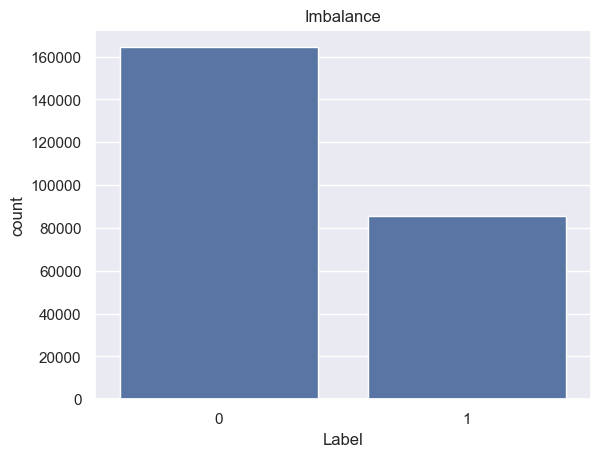

Imbalance Percentage% :
 Label
0    65.7332
1    34.2668
Name: proportion, dtype: float64


In [75]:
# viewing Imbalace in dataset
sns.countplot(x="Label", data=data)
plt.title('Imbalance')
plt.show()
print('Imbalance Percentage% :\n',data.Label.value_counts(normalize=True)*100)

**Observation:**
- The dataset is Imbalanced over label

## Imbalance treatment:
- we can choose SMOTE as a method as the dataset is sufficiently large

In [76]:
#Upscaling the data
sm = SMOTE(random_state=42)
X_final, y_final = sm.fit_resample(X, y)

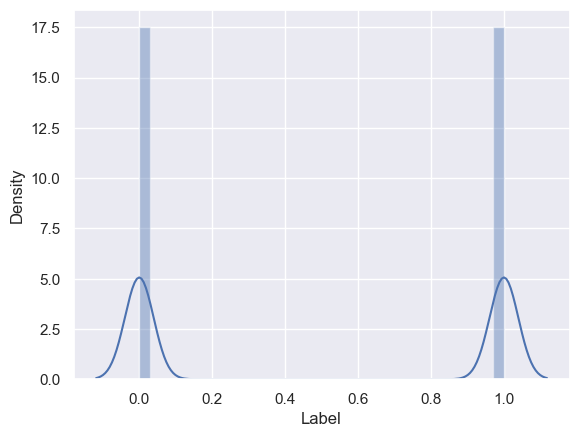

Data samples after SMOTE:  Label
1    164333
0    164333
Name: count, dtype: int64


In [78]:
#distribution of both classes after upscaling
sns.distplot(y_final)
plt.show()
print('Data samples after SMOTE: ',y_final.value_counts())

**Observation:**
- Now this dataset is balanced.

## Feature slection using information gain

In [79]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_final,y_final)
mutual_info=pd.Series(mutual_info)
mutual_info.index=X.columns
mutual_info.sort_values(ascending=False)

DER_met_phi_centrality         0.210294
DER_pt_ratio_lep_tau           0.207169
DER_deltar_tau_lep             0.192208
DER_mass_MMC                   0.177728
PRI_lep_eta                    0.176724
PRI_tau_eta                    0.173741
PRI_tau_phi                    0.160697
PRI_met_phi                    0.160094
PRI_lep_phi                    0.159632
PRI_jet_leading_eta            0.107154
PRI_jet_leading_phi            0.103078
DER_mass_transverse_met_lep    0.100756
DER_mass_vis                   0.098836
PRI_tau_pt                     0.098097
DER_lep_eta_centrality         0.081751
DER_deltaeta_jet_jet           0.064533
DER_pt_tot                     0.057854
DER_prodeta_jet_jet            0.051534
PRI_jet_subleading_phi         0.048340
PRI_jet_subleading_eta         0.046820
PRI_lep_pt                     0.042244
DER_mass_jet_jet               0.041774
DER_pt_h                       0.039212
PRI_jet_num                    0.036244
PRI_jet_leading_pt             0.031646


# COMBINING MUTUAL INFO GAIN / OUTLIER COLUMNS / CORRELATED GROUPS

In [87]:
feat=pd.read_csv('fsel.csv')
feat

Sr. No.                      FEATURE  INFO GAIN  OUTLIER %  \
0       1.0       DER_met_phi_centrality   0.210294       0.00   
1       2.0         DER_pt_ratio_lep_tau   0.207169       0.00   
2       3.0           DER_deltar_tau_lep   0.192208       0.00   
3       4.0                 DER_mass_MMC   0.177728      15.25   
4       5.0                  PRI_lep_eta   0.176724       0.00   
5       6.0                  PRI_tau_eta   0.173741       0.00   
6       7.0                  PRI_met_phi   0.160094       0.00   
7       8.0                  PRI_tau_phi   0.160697       0.00   
8       9.0                  PRI_lep_phi   0.159632       0.00   
9      10.0  DER_mass_transverse_met_lep   0.100756       0.00   
10     11.0                   PRI_tau_pt   0.098097       0.00   
11     12.0                 DER_mass_vis   0.098836       0.00   
12     13.0          PRI_jet_leading_eta   0.107154      39.97   
13     14.0          PRI_jet_leading_phi   0.103078      39.97   
14     15.0       DER_lep_eta_centrality   0.081751      70.98   
15     16.0         DER_deltaeta_jet_jet   0.064533      70.98   
16     17.0          DER_prodeta_jet_jet   0.051534      70.98   
17     18.0                   DER_pt_tot   0.057854       0.00   
18     19.0       PRI_jet_subleading_phi   0.048340      70.98   
19     20.0       PRI_jet_subleading_eta   0.046820      70.98   
20     21.0             DER_mass_jet_jet   0.041774      70.98   
21     22.0                     DER_pt_h   0.039212       0.00   
22     23.0                  PRI_jet_num   0.036244       0.00   
23     24.0                   DER_sum_pt   0.031598       0.00   
24     25.0           PRI_jet_leading_pt   0.031646      39.97   
25     26.0                   PRI_lep_pt   0.042244       0.00   
26     27.0               PRI_jet_all_pt   0.028357       0.00   
27     28.0                      PRI_met   0.029953       0.00   
28     29.0        PRI_jet_subleading_pt   0.023525      70.98   
29     30.0                PRI_met_sumet   0.021576       0.00   
30      NaN                          NaN        NaN        NaN   

    CORRELATION GROUP  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
5                 NaN  
6                 NaN  
7                 NaN  
8                 NaN  
9                 NaN  
10                NaN  
11                NaN  
12                3.0  
13                3.0  
14                1.0  
15                1.0  
16                1.0  
17                NaN  
18                1.0  
19                1.0  
20                1.0  
21                NaN  
22                NaN  
23                1.0  
24                3.0  
25                NaN  
26                1.0  
27                NaN  
28                1.0  
29                1.0  
30                NaN

##  DROPPING FEATURES BASED ON THREE FACTORS
- MUTUAL INFO GAIN
- % OF OUTLIERS
- CORRELATION WITH OTHER FEATURES

- Selecting first 20 features based on info gain would result in high number of outliers features in data & 5 very high correlated features in data- 
We can see a sharp dip in info gain after 9th feature & 14th featur
- 
Selecting only 9 features out of 30 would be very less & moreover would not carry any feature from the highly correlated groups resulting in information loss from group 1 of 7 correlated featur
- .
Selecting 14 features can serve our purpose by eliminating all features with more than 70 % outliers but will miss the information carried by  7 features of group 1 of 99 % correlated features.


# Selecting first 15 features seems to be the best scenario as
- 50 % of the features with more than 80 % mutual info score would be included in model
  learning.
- It contains 1 feature from group 1 of 7 99% correlated features
- It would automatically eliminate the 6 features with more than 70 % outliers.
- Hence proceeding with first 15 features and dropping the rest for model building.

In [88]:
# columns to be dropped
drop_columns=["DER_deltaeta_jet_jet","DER_prodeta_jet_jet","DER_pt_tot","PRI_jet_subleading_phi","PRI_jet_subleading_eta","DER_mass_jet_jet","DER_pt_h","PRI_jet_num","DER_sum_pt","PRI_jet_leading_pt","PRI_lep_pt","PRI_jet_all_pt","PRI_met","PRI_jet_subleading_pt","PRI_met_sumet"]



In [89]:
#Selecting the top 15 features baced on information gain & removing the least mutual info columns
X_final=X_final.drop(drop_columns,axis=1)

## Train/Test split:

In [91]:
#splitting the data set into train/validation set(80-20%) with random state=42
#so we set random state = 42 for easier inference of model comparison
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, train_size=0.80,random_state=42)

- custom evaluation & auc function

In [94]:
#building custom evaluation function
def evaluate(y_true,y_pred):
    confusion = confusion_matrix(y_true, y_pred ) #confusion matrix
    print(confusion) 
    sns.heatmap(confusion/np.sum(confusion), annot=True, 
            fmt='.2%', cmap='YlGn',linewidth=1) #heatmap of confusion matrix
    plt.show()
    print(f'Accuracy on data : {accuracy_score(y_true, y_pred)*100:.2f}%')
    print(f'F1 Score on data : {f1_score(y_true, y_pred):.2f}')
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print('Sensitivity/Recall/TPR',round(TP / float(TP+FN),2))
    print('Precision',round(TP / float(TP+FP),2))

In [95]:
# defining AREA UNDER CURVE function
def ROC( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FP Rate or [1 - TN Rate]',color='blue')
    plt.ylabel('TP Rate',color='blue')
    plt.title('ROC Curve',color='r')
    plt.legend(loc="best")
    plt.show()

    return None

# Model Building:

## 1. Logistic regression

In [92]:
#logistic regression as baseline model
logreg = LogisticRegression()#creating model instance
logreg.fit(X_train, y_train) #training the baseline model

LogisticRegression()

[[ 90416  41209]
 [ 29226 102081]]


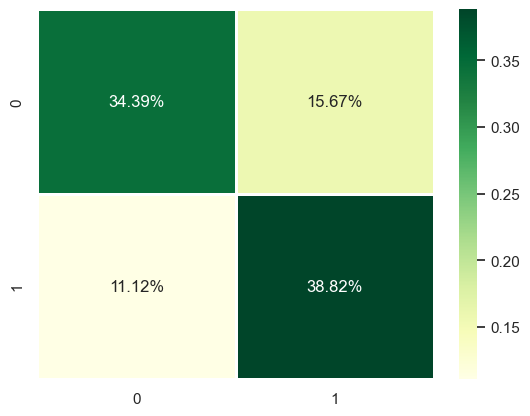

Accuracy on data : 73.21%
F1 Score on data : 0.74
Sensitivity/Recall/TPR 0.78
Precision 0.71


In [96]:
#Prediction on train data

y_train_pred = logreg.predict(X_train)
evaluate(y_train, y_train_pred)

[[22340 10368]
 [ 7389 25637]]


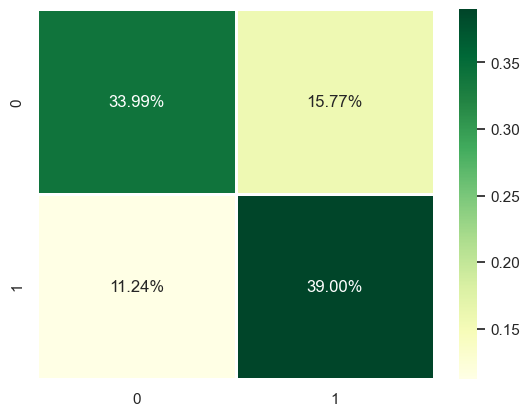

Accuracy on data : 72.99%
F1 Score on data : 0.74
Sensitivity/Recall/TPR 0.78
Precision 0.71


In [97]:
#Prediction on validation data

y_test_pred = logreg.predict(X_test)
evaluate(y_test, y_test_pred)

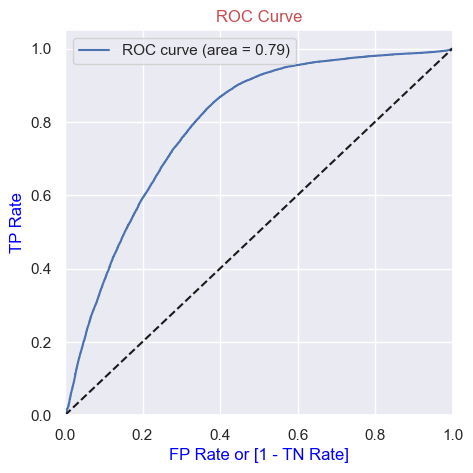

In [98]:
#ROC AUC plot for baseline logistic reg model
y_proba = logreg.predict_proba(X_test)[:,1]
ROC(y_test, y_proba)

**Observation:**
- ROC(AUC) is **0.79.** for Logistic Regression

## 2.1 Decision Tree Classifier Model

In [99]:
dtree = DecisionTreeClassifier(max_depth =11, random_state=42)
dtree.fit(X_train, y_train)
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

[[107104  24521]
 [ 18466 112841]]


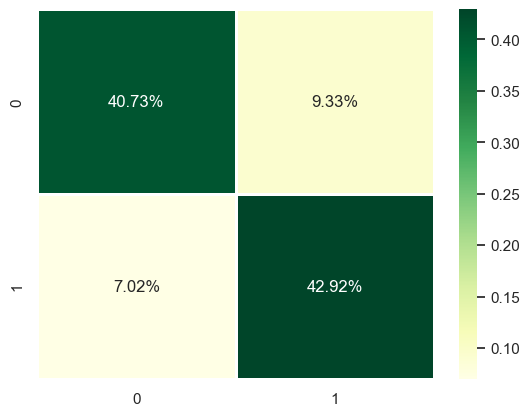

Accuracy on data : 83.65%
F1 Score on data : 0.84
Sensitivity/Recall/TPR 0.86
Precision 0.82


In [100]:
#evaluate on train data
evaluate(y_train,y_train_pred)

[[25739  6969]
 [ 5359 27667]]


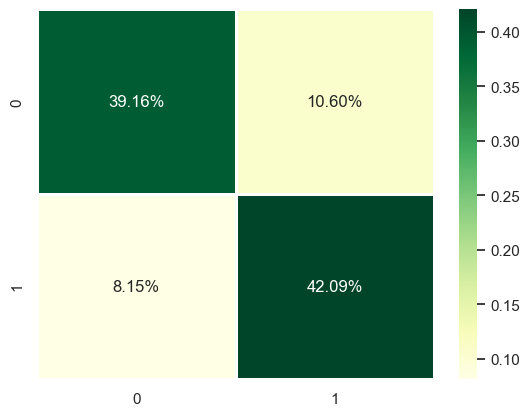

Accuracy on data : 81.25%
F1 Score on data : 0.82
Sensitivity/Recall/TPR 0.84
Precision 0.8


In [101]:
#evaluate on validation data
evaluate(y_test, y_test_pred)

In [102]:
y_proba = dtree.predict_proba(X_test)[:,1] #prediction probability
ROC(y_test, y_proba) #ROC_AUC curve

**Observation:**
- ROC(AUC) is **0.89.** for Decision Tree.

## 3. Ensamble Model (Random Forest Classifier):

### Hyperparameter tuning for Random Forest CLassifier:
- "max_depth": [5, 10, 15],
- "min_samples_leaf": [5, 10, 20],
- 'n_estimators': [25,50]

In [103]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# parameters
params = {
    "max_depth": [5, 10, 15,20],
    "min_samples_leaf": [5, 10, 15],
    'n_estimators': [50,100]
}
#performing cross validation with 4 folds
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="f1")

grid_search.fit(X_train, y_train) #training the model

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [50, 100]},
             scoring='f1', verbose=1)

In [104]:
#cross validation result
print(grid_search.best_score_) #best f1 score
rf_best = grid_search.best_estimator_ #best params
rf_best

0.8403422820996038


RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [106]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

[[118182  13443]
 [  9589 121718]]


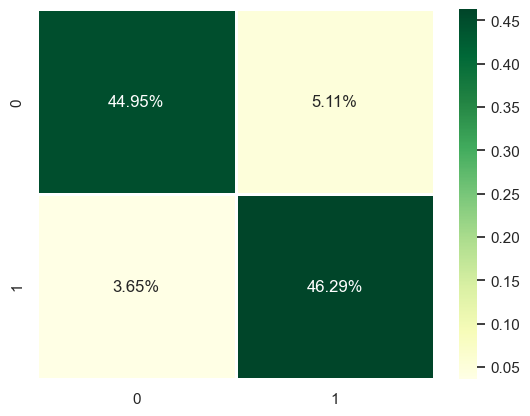

Accuracy on data : 91.24%
F1 Score on data : 0.91
Sensitivity/Recall/TPR 0.93
Precision 0.9


In [107]:
#evaluate on train data
evaluate(y_train,y_train_pred)

[[27046  5662]
 [ 4830 28196]]


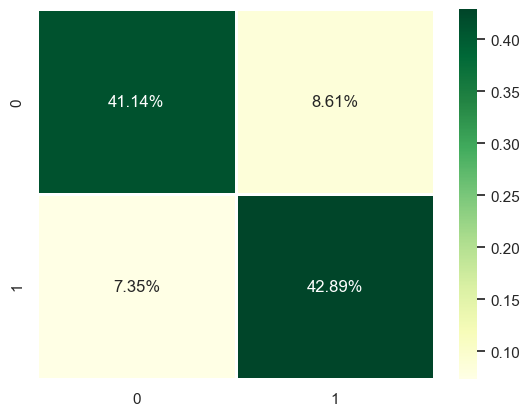

Accuracy on data : 84.04%
F1 Score on data : 0.84
Sensitivity/Recall/TPR 0.85
Precision 0.83


In [108]:
#evaluate on validation data
evaluate(y_test, y_test_pred)

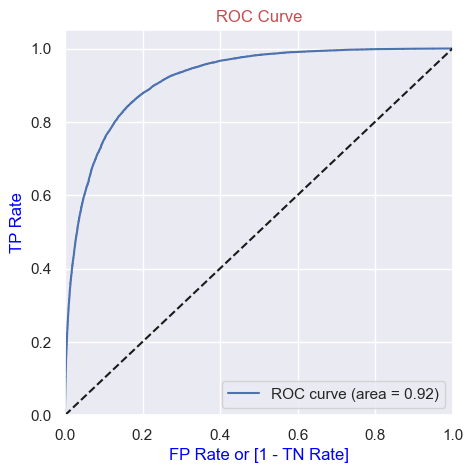

In [109]:
y_proba = rf_best.predict_proba(X_test)[:,1] #prediction probability
ROC(y_test, y_proba) #ROC_AUC curve

**Observation:**
- ROC(AUC) is **0.92.** for Random Forest with Hyperparameter tuning

## 4. AdaBoost Classifier Model:

In [110]:
# shallow tree as weak learner
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# Fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# Test error
y_pred = shallow_tree.predict(X_test) 
score = f1_score(y_test, y_pred) #f1 score as metrics
score

0.7576078449426822

In [111]:
# Adaboost with shallow tree as base estimator

# number of trees to be used or estimators
estimators = list(range(1, 150, 10))

# Loop through the estimators
adaboost_scores = []
for num_est in estimators:
    adaboost = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = num_est, random_state=42)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    score = f1_score(y_test, y_pred) #f1 score as metrics
    adaboost_scores.append(score)

In [112]:
# Plot of scores corrosponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, adaboost_scores)
plt.xlabel('n_estimators')
plt.ylabel('F1 Score')
plt.show()

**Observation:**
- We can see from the graph that after **n_estimators = 110** the F1 score nearly `plateaus.`
- We choose 100 as our no of trees for the model.

In [113]:
adaboost_best = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 110, random_state=42)
adaboost_best.fit(X_train, y_train) #training the model


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=100),
                   n_estimators=110, random_state=42)

In [120]:
y_train_pred = adaboost.predict(X_train)
y_test_pred = adaboost.predict(X_test)

[[108422  23203]
 [ 21131 110176]]


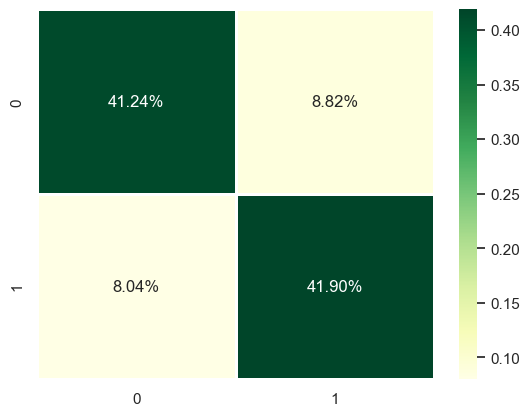

Accuracy on data : 83.14%
F1 Score on data : 0.83
Sensitivity/Recall/TPR 0.84
Precision 0.83


In [115]:
#evaluate on training data
evaluate(y_train, y_train_pred)

[[26753  5955]
 [ 5343 27683]]


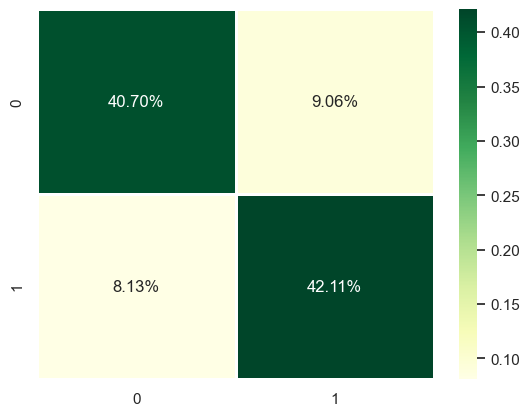

Accuracy on data : 82.81%
F1 Score on data : 0.83
Sensitivity/Recall/TPR 0.84
Precision 0.82


In [121]:
#evaluate on validation data
evaluate(y_test, y_test_pred)

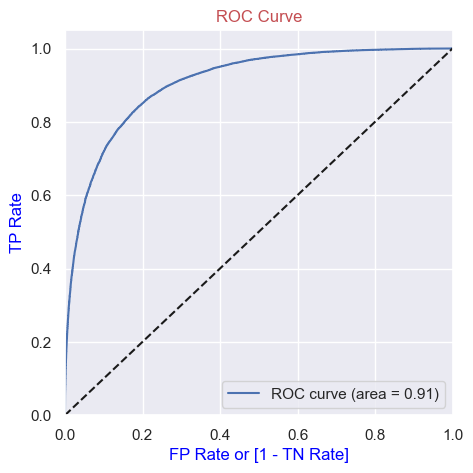

In [117]:
y_proba = adaboost_best.predict_proba(X_test)[:,1] #prediction probability
ROC(y_test, y_proba) #ROC_AUC curve

**Observation:**
- AUC/ROC is **0.91.** for ADABoost with Hyperparameter tuning
- which is nearly same for hyperparameter tuned random forest model.
- **Considering computational cost of ADABoost we are goig to choose `Random Forest model` to be our `best model` with ROC(AUC) = `0.92`.**

## RESULTS OF ALL MODELS

### 1. Logistic regression: 
   - ROC/AUC: 0.79
   - F1 Score: 0.74
   
### 2. Decision Tree Classifier Model: 
   - ROC/AUC: 0.89
   - F1 Score: 0.81
   
### 4. Hyperparameter tuning for Random Forest CLassifier:
   - ROC/AUC: 0.92
   - F1 Score: 0.84
   
### 5. AdaBoost Classifier Model: 
   - ROC/AUC: 0.91
   - F1 Score: 0.83


# Conclusion:
1. To summarize everything initially we are reading the dataset with all columns displayed
2. Then we are finding the missing columns in test data and dropping them
3. Then we are doing the data analysis by separating the signal and background events and storing it in separate datasets
4. Then we are plotting the distribution of signal and background events
5. And from the heatmap we determined that signal and background events are nearly 1:2 ratio
6. After that we are pre-processing the data by removing the columns with more than 70% outliers
7. Then we are plotting the inference and pair plot of removed columns.
8. And we have replaced the label class as a binary classification problem
9. Then we are standardizing the dataset and upscaling the imbalance class using SMOTE technique
10. And after splitting it with 80-20% ratio with random seed 42 we are training it with logistic regression
11. And keeping the logistic regression model we are comparing its metrics with different models like Decision tree, Random forest, adaboost classifier model to get the best model to test on test dataset
13. We have considered the best model as random forest.

# Improvement:
1. We can further see the importance of features in random forest and tune unimportant fetures to improve models accuracy.
2. we can use XGBoost, Neural Networks(MLPs) to improve the model training.